Exercise 1: Task: Extract the title (e.g., Mr., Miss, Master) from the Name column and determine the survival rate for each title.

In [ ]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')
print(df)

In [2]:
df['Title'] = df['Name'].str.extract(r'\b(Mr|Mrs|Master|Miss|Ms|Dr)\b', expand=False)

Total = df.groupby('Title').size()
Survived = df.groupby('Title')['Survived'].sum().sort_index()

survived_total = pd.DataFrame({
    'Total' : Total,
    'Survived': Survived
})

survived_total['SurvivalRate'] = (survived_total['Survived']/survived_total['Total']) * 100

for title, row in survived_total.iterrows():
    print(title, "had a survival rate of", row['SurvivalRate'], "%")

Dr had a survival rate of 42.857142857142854 %
Master had a survival rate of 57.49999999999999 %
Miss had a survival rate of 69.78021978021978 %
Mr had a survival rate of 15.83011583011583 %
Mrs had a survival rate of 79.52755905511812 %
Ms had a survival rate of 100.0 %


Exercise 2: Group passengers based on the first letter of their Cabin (e.g., A, B, C...) and compute:

Total passengers

Survival rate per cabin group

Note: Handle missing cabins by labeling them as "Unknown".

In [3]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

temp = [cabin[:1] for cabin in df['Cabin']]
df['Temp'] = temp

df_grouped = df['Temp'].value_counts().sort_index()
print(df_grouped)

for cabin, passengers in df_grouped.items():
    print('There were a total of', passengers, 'passengers in cabins starting with', cabin)


Total = df.groupby('Temp').size()
Survived = df.groupby('Temp')['Survived'].sum().sort_index()

survived_total = pd.DataFrame({
    'Total': Total,
    'Survived': Survived
})

survived_total['SurvivalRate'] = (survived_total['Survived']/survived_total['Total']) * 100

for cabin, row in survived_total.iterrows():
    print("The cabins", cabin, "had a survival rate of", row['SurvivalRate'], "%")


Temp
A     15
B     47
C     59
D     33
E     32
F     13
G      4
T      1
U    687
Name: count, dtype: int64
There were a total of 15 passengers in cabins starting with A
There were a total of 47 passengers in cabins starting with B
There were a total of 59 passengers in cabins starting with C
There were a total of 33 passengers in cabins starting with D
There were a total of 32 passengers in cabins starting with E
There were a total of 13 passengers in cabins starting with F
There were a total of 4 passengers in cabins starting with G
There were a total of 1 passengers in cabins starting with T
There were a total of 687 passengers in cabins starting with U
The cabins A had a survival rate of 46.666666666666664 %
The cabins B had a survival rate of 74.46808510638297 %
The cabins C had a survival rate of 59.32203389830508 %
The cabins D had a survival rate of 75.75757575757575 %
The cabins E had a survival rate of 75.0 %
The cabins F had a survival rate of 61.53846153846154 %
The cab

Exercise 3: Family Size Impact
Task:
Create a new column FamilySize = SibSp + Parch + 1 and categorize family size as:

'Single' (1)

'Small' (2–4)

'Large' (5+)

Then compute survival rates for each category.

In [4]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

def categorize_family(family_size):
    if family_size == 1:
        return 'Single'
    elif 2 <= family_size <= 4:
        return 'Small'
    else:
        return 'Large'

df['Family_Category'] = df['Family_size'].apply(categorize_family)


Total = df.groupby('Family_Category').size()
Survived = df.groupby('Family_Category')['Survived'].sum().sort_index()

survived_total = pd.DataFrame({
    'Total': Total,
    'Survived': Survived
})
print(survived_total)

survived_total['SurvivalRate'] = (survived_total['Survived']/survived_total['Total']) * 100

for family_category, row in survived_total.iterrows():
    print("The", family_category, "families had a survival rate of", row['SurvivalRate'], "%")

                 Total  Survived
Family_Category                 
Large               62        10
Single             537       163
Small              292       169
The Large families had a survival rate of 16.129032258064516 %
The Single families had a survival rate of 30.353817504655495 %
The Small families had a survival rate of 57.87671232876712 %


Exercise 4: Age Binning and Survival Analysis
Task:
Create age bins: [0–10], [11–20], ..., [71+] and use .cut() to assign age groups. Plot the survival rate by age group.

In [5]:
bins = [0, 10, 20, 30, 40, 50, 60, 70]

labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '70+']

df['AgeGroup'] = pd.cut(df['Age'], bins = bins, labels = labels, include_lowest = True)

Total = df.groupby('AgeGroup', observed=True).size()
Survived = df.groupby('AgeGroup', observed=True)['Survived'].sum().sort_index()

survived_total = pd.DataFrame({
    'Total': Total,
    'Survived': Survived
})

survived_total['SurvivalRate'] = (survived_total['Survived']/survived_total['Total']) * 100
print(survived_total)
for age_group, row in survived_total.iterrows():
    print("Age group", age_group, "had a survival rate of", row['SurvivalRate'], "%")


          Total  Survived  SurvivalRate
AgeGroup                               
0-10         64        38     59.375000
11-20       115        44     38.260870
21-30       230        84     36.521739
31-40       155        69     44.516129
41-50        86        33     38.372093
51-60        42        17     40.476190
70+          17         4     23.529412
Age group 0-10 had a survival rate of 59.375 %
Age group 11-20 had a survival rate of 38.26086956521739 %
Age group 21-30 had a survival rate of 36.52173913043478 %
Age group 31-40 had a survival rate of 44.516129032258064 %
Age group 41-50 had a survival rate of 38.372093023255815 %
Age group 51-60 had a survival rate of 40.476190476190474 %
Age group 70+ had a survival rate of 23.52941176470588 %


Exercise 5: Cross Tab: Class vs. Sex vs. Survival
Task:
Create a pivot table showing survival counts and rates grouped by both Pclass and Sex.

In [6]:
pivot = df.pivot_table(
    values='Survived',
    index='Pclass',
    columns='Sex',
    aggfunc='mean'
)

print(pivot)

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


Exercise 6: Use the Title extracted in Exercise 1 to impute missing Age values with the median age of each title group.

In [7]:
title_medians = df.groupby('Title')['Age'].median()
print(title_medians)

df['Age'] = df.apply(
    lambda row: title_medians[row['Title']] if pd.isna(row['Age']) else row['Age'], axis=1
)

print('Number of Nan ages:', df['Age'].isna().sum())

Title
Dr        46.5
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Ms        28.0
Name: Age, dtype: float64
Number of Nan ages: 0


Exercise 7: Task:
Encode Sex, Embarked, and Title using .map() or pd.get_dummies(), and compute a correlation matrix to see which features most strongly correlate with Survived.

              Survived   Sex_map  Embarked_map  Title_map
Survived      1.000000  0.543351      0.108669   0.439530
Sex_map       0.543351  1.000000      0.118593   0.779614
Embarked_map  0.108669  0.118593      1.000000   0.165745
Title_map     0.439530  0.779614      0.165745   1.000000


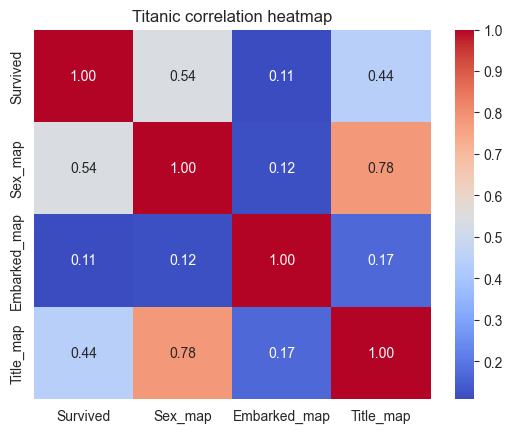

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Sex_map'] = df['Sex'].map({'male': 0, 'female': 1})
embarked_map = {'S':0, 'C':1, 'Q':2}
df['Embarked_map'] = df['Embarked'].map(embarked_map)
title_map = {
    'Mr' : 0,
    'Mrs' : 1,
    'Master' : 2,
    'Dr' : 3,
    'Miss' : 4,
    'Ms' : 5,
}
df['Title_map'] = df['Title'].map(title_map)

corr_columns = ['Survived', 'Sex_map', 'Embarked_map', 'Title_map']
corr_matrix = df[corr_columns].corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Titanic correlation heatmap')
plt.show()

Exercise 8: Group passengers by Ticket number and identify tickets shared by multiple passengers. For these, compute the survival rate of all passengers sharing the same ticket.

In [9]:
Total = df.groupby('Ticket').size()
Survived = df.groupby('Ticket')['Survived'].sum().sort_index()

survived_total = pd.DataFrame({
    'Total': Total,
    'Survived': Survived
})

survived_total['SurvivalRate'] = (survived_total['Survived']/survived_total['Total']) * 100

for ticket, row in survived_total.iterrows():
    if row['Survived'] > 1:
        print("Ticket", ticket,"with", row['Survived'], "people, had a survival rate of", row['SurvivalRate'], "%")

Ticket 110152 with 3.0 people, had a survival rate of 100.0 %
Ticket 110413 with 2.0 people, had a survival rate of 66.66666666666666 %
Ticket 111361 with 2.0 people, had a survival rate of 100.0 %
Ticket 113505 with 2.0 people, had a survival rate of 100.0 %
Ticket 113572 with 2.0 people, had a survival rate of 100.0 %
Ticket 113760 with 4.0 people, had a survival rate of 100.0 %
Ticket 113781 with 2.0 people, had a survival rate of 50.0 %
Ticket 113806 with 2.0 people, had a survival rate of 100.0 %
Ticket 11751 with 2.0 people, had a survival rate of 100.0 %
Ticket 11767 with 2.0 people, had a survival rate of 100.0 %
Ticket 11967 with 2.0 people, had a survival rate of 100.0 %
Ticket 12749 with 2.0 people, had a survival rate of 100.0 %
Ticket 13502 with 3.0 people, had a survival rate of 100.0 %
Ticket 1601 with 5.0 people, had a survival rate of 71.42857142857143 %
Ticket 16966 with 2.0 people, had a survival rate of 100.0 %
Ticket 17421 with 3.0 people, had a survival rate of 75

Exercise 9: Calculate a new column FarePerPerson = Fare / FamilySize. Analyze the correlation between FarePerPerson and Survived.

               Survived  FarePerPerson
Survived         1.0000         0.2216
FarePerPerson    0.2216         1.0000


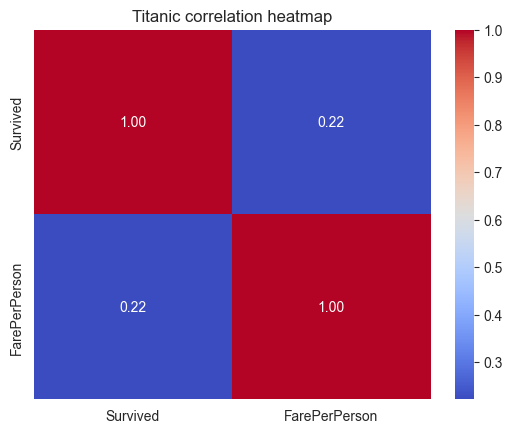

In [35]:
df['FarePerPerson'] = df['Fare'] / df['Family_size']

corr_columns = ['Survived', 'FarePerPerson']
corr_matrix = df[corr_columns].corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Titanic correlation heatmap')
plt.show()

Exercise 10: Create a new categorical feature that combines Pclass and fare quantiles (e.g., '1_HighFare', '2_LowFare', etc.). Analyze survival across these new categories.

In [76]:
def fare_quantiles(group):
    return pd.qcut(group['FarePerPerson'], q=2, labels=['LowFare', 'HighFare'])

df['FareQuantiles'] = df.groupby('Pclass')['FarePerPerson'].transform(lambda x: pd.qcut(x, q=2, labels=['LowFare', 'HighFare']))

df['FareCategory'] = df['Pclass'].astype(str) + '_' + df['FareQuantiles'].astype(str)

Total = df.groupby('FareCategory').size()
Survived = df.groupby('FareCategory')['Survived'].sum().sort_index()

survived_total = pd.DataFrame({
    'Total': Total,
    'Survived': Survived
})
print(survived_total)

survived_total['SurvivalRate'] = (survived_total['Survived']/survived_total['Total']) * 100

for fare_category, row in survived_total.iterrows():
    print("The fare category", fare_category, "had a survival rate of", row['SurvivalRate'], "%")

              Total  Survived
FareCategory                 
1_HighFare      108        72
1_LowFare       108        64
2_HighFare       34        12
2_LowFare       150        75
3_HighFare      227        45
3_LowFare       264        74
The fare category 1_HighFare had a survival rate of 66.66666666666666 %
The fare category 1_LowFare had a survival rate of 59.25925925925925 %
The fare category 2_HighFare had a survival rate of 35.294117647058826 %
The fare category 2_LowFare had a survival rate of 50.0 %
The fare category 3_HighFare had a survival rate of 19.823788546255507 %
The fare category 3_LowFare had a survival rate of 28.030303030303028 %
